# 1. LINK DATASET

***https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset?select=The+IQ-OTHNCCD+lung+cancer+dataset***

# 2. Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

# 3. Augmentasi Data

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

# 4. Normalisasi data val dan set

In [3]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# 5. Split dataset menjadi train,val dan test

In [4]:
import shutil
from sklearn.model_selection import train_test_split

#Memanggil dataset
dataset_dir = 'The IQ-OTHNCCD lung cancer dataset'

#Membagi data set
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

#Nama-nama folder kelas
class_names = [
    'Bengin Cases',
    'Malignant Cases',
    'Normal Cases',
]

#Membagi data untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    filenames = os.listdir(class_dir)
    train_files, test_val_files = train_test_split(filenames, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)
    
    #Membuat direktori
    train_dir = os.path.join(dataset_dir, 'train', class_name)
    val_dir = os.path.join(dataset_dir, 'val', class_name)
    test_dir = os.path.join(dataset_dir, 'test', class_name)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    #Proses Penyalinan gambar
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)  
    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)    
    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)

# 6. Membuat generator data untuk setiap subset

In [5]:
# Direktori untuk setiap subset
train_dir = 'The IQ-OTHNCCD lung cancer dataset\\test'
val_dir = 'The IQ-OTHNCCD lung cancer dataset\\val'
test_dir = 'The IQ-OTHNCCD lung cancer dataset\\test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 166 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Found 166 images belonging to 3 classes.


# 7. Menggunakan sequential model

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Membuat model Sequential
model = Sequential()

#CNN
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Menambahkan layer
model.add(Flatten())

#DNN
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=30, verbose=1)

Epoch 1/30
6/6 [==============================] - 16s 3s/step - loss: 0.9689 - accuracy: 0.5120 - val_loss: 0.9299 - val_accuracy: 0.5122
Epoch 2/30
6/6 [==============================] - 15s 2s/step - loss: 0.9480 - accuracy: 0.5060 - val_loss: 0.9256 - val_accuracy: 0.5061
Epoch 3/30
6/6 [==============================] - 15s 2s/step - loss: 0.9353 - accuracy: 0.5120 - val_loss: 0.9313 - val_accuracy: 0.5122
Epoch 4/30
6/6 [==============================] - 15s 2s/step - loss: 0.9368 - accuracy: 0.5120 - val_loss: 0.9210 - val_accuracy: 0.5122
Epoch 5/30
6/6 [==============================] - 15s 2s/step - loss: 0.9471 - accuracy: 0.5181 - val_loss: 0.9200 - val_accuracy: 0.4695
Epoch 6/30
6/6 [==============================] - 15s 2s/step - loss: 0.9529 - accuracy: 0.4940 - val_loss: 0.9504 - val_accuracy: 0.5122
Epoch 7/30
6/6 [==============================] - 15s 2s/step - loss: 0.9495 - accuracy: 0.5120 - val_loss: 0.9127 - val_accuracy: 0.5122
Epoch 8/30
6/6 [==================

# 8. Evaluasi model terhadap data test

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Loss on test data: {test_loss}')
print(f'Accuracy on test data: {test_accuracy}')

6/6 [==============================] - 3s 448ms/step - loss: 0.9148 - accuracy: 0.5120
Loss on test data: 0.9148275256156921
Accuracy on test data: 0.5120481848716736


# 9.Membuat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

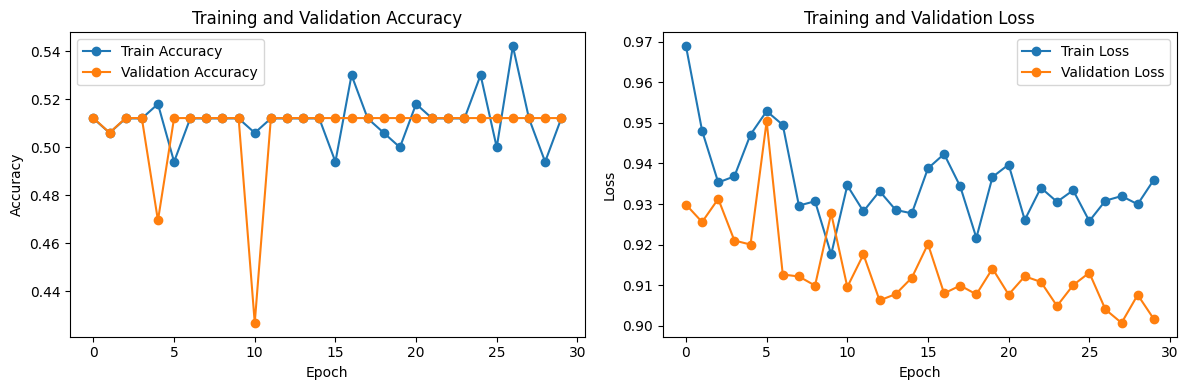

In [11]:
import matplotlib.pyplot as plt

# Dapatkan metrik dari history pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrik akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot metrik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()